In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('E:\Datasets\Mall_Customers.csv')

In [6]:
df.rename(columns = {'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace = True)


In [7]:
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [9]:
df.isnull().sum()

CustomerID        0
Genre             0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [10]:
# Evaluating a linear relationship btwn Age vs Annual income
# Evaluating a linear relationship btwn age vs spending score
# Evaluating a linear relationship btwn annual income v spending score
# Evaluating a linear relationship btwn genre v spending score

from sklearn.linear_model import LinearRegression

In [15]:
X = df[['Age']]
Y = df['Annual_Income']

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X,Y)

LinearRegression()

In [19]:
lm.intercept_

61.4656312529776

In [20]:
lm.coef_

array([-0.02331097])

In [21]:
Yhat = lm.predict(X)

In [12]:
# Visualisation Evaluation
import matplotlib.pyplot as plt
%matplotlib inline

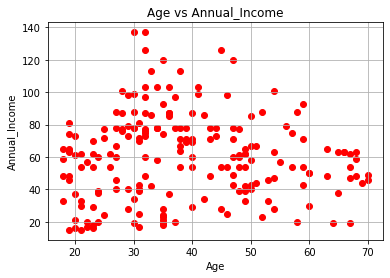

In [22]:
plt.scatter(X,Y,color = 'r',marker = 'o')
plt.title('Age vs Annual_Income')
plt.xlabel('Age')
plt.ylabel('Annual_Income')
plt.grid()

Text(0, 0.5, 'Annual Income')

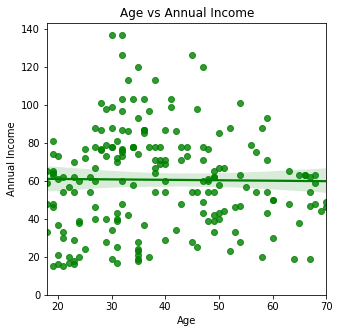

In [23]:
import seaborn as sns
%matplotlib inline
width = 5
height = 5
plt.figure(figsize=(width,height))
sns.regplot(x = 'Age',y = 'Annual_Income',color = 'g',marker = 'o', data = df)
plt.ylim(0,)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')

In [24]:
lm.score(X,Y)

0.00015371146368514665

In [25]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y,Yhat)
MSE

686.2808945418024

In [53]:
# Multiple linear regression

X1 = df[['Age','Annual_Income']]
Y1 = df['Spending_Score']

In [27]:
lm.fit(X1,Y1)

LinearRegression()

In [51]:
X1.shape

(200, 2)

In [49]:
Y1.shape

(200,)

In [28]:
lm.intercept_

73.34785222186397

In [29]:
lm.coef_

array([-0.60478726,  0.00574856])

In [31]:
Yhat1 =lm.predict(X1)

c:\users\ncmol\appdata\local\programs\common\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\ncmol\appdata\local\programs\common\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


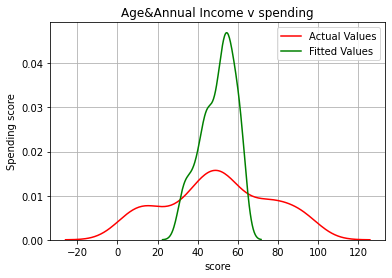

In [32]:
#distribution plot for MLR

ax1 = sns.distplot(Y1,hist = False,color = 'r',label = "Actual Values")
sns.distplot(Yhat1,hist = False,color = 'g',label = "Fitted Values",ax = ax1)
plt.title('Age&Annual Income v spending')
plt.xlabel('score')
plt.ylabel('Spending score')
plt.grid()
plt.legend()
plt.show()

In [55]:
X2 = df[['Age','Annual_Income']]
Y2 = df['Spending_Score']

In [56]:
X2.shape

(200, 2)

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 8)
X2_poly = poly.fit_transform(X2)
X2_poly.shape

(200, 45)

In [58]:
lm.fit(X2_poly,Y2)

LinearRegression()

In [59]:
lm.intercept_

-170.08239016104636

In [60]:
lm.coef_

array([-1.08474739e-01,  6.26134246e-04, -7.60071723e-04,  1.37263895e-02,
       -2.74841207e-03, -6.90762500e-03,  1.40513307e-01,  1.91490357e-02,
       -4.22521752e-02,  8.28365662e-02, -1.18173322e-02, -8.98264951e-04,
        6.95727563e-03, -9.00676525e-03, -1.63645112e-03,  3.00000641e-04,
        4.13052769e-04, -8.36697269e-04,  5.57151855e-04,  9.08544011e-05,
        1.89550383e-05, -2.19345907e-06, -1.66698576e-05,  2.42832353e-05,
       -8.78024803e-06, -5.10641675e-06, -3.38819964e-07, -1.41161813e-07,
       -1.37673644e-08,  2.38694256e-07, -2.84228750e-07,  5.68544351e-08,
        5.02431989e-08,  2.54356484e-08, -1.39636403e-09,  7.48074885e-10,
        1.80530725e-10, -1.19659095e-09,  1.28580661e-09, -2.63834084e-10,
       -1.04499804e-11, -2.13030569e-10, -1.45415356e-11,  2.98187543e-12,
       -1.52023218e-12])

In [61]:
Yhat2 = lm.predict(X2_poly)

c:\users\ncmol\appdata\local\programs\common\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\ncmol\appdata\local\programs\common\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Prices')

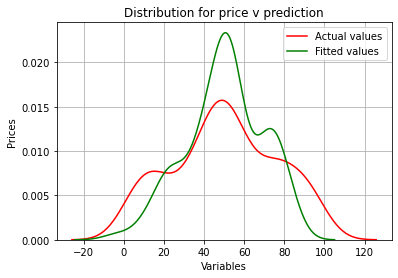

In [64]:
# polynomial regression for one dimensional, 3rd order
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#plt.subplots(figsize=(7,7))

ax1 = sns.distplot(Y2,hist=False,color = 'r',label = 'Actual values')
sns.distplot(Yhat2,hist=False,color = 'g',label = 'Fitted values',ax = ax1)
plt.title('Distribution for price v prediction')
plt.grid()
plt.legend()
plt.xlabel('Variables')
plt.ylabel('Prices')

In [63]:
lm.score(X2_poly,Y2)

0.5455208341344784